<a href="https://colab.research.google.com/github/dzeko5959/AI/blob/main/ML/UDEM/A1_6_Seunghyeon_Lee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import and Visualize Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving A1.6 Tiempo de Entrega.csv to A1.6 Tiempo de Entrega.csv


In [ ]:
import pandas as pd

df = pd.read_csv("A1.6 Tiempo de Entrega.csv")

There are strange values in Calificacion column, not numbers. So I changed them into average value.

In [ ]:
valid_calificaciones = pd.to_numeric(df['Calificacion'], errors='coerce')  # Replace non numbers into NAN
mean_calificacion = valid_calificaciones.mean()  # Average of number values.

# Changing non number values into average value.
df['Calificacion'] = valid_calificaciones.fillna(mean_calificacion)

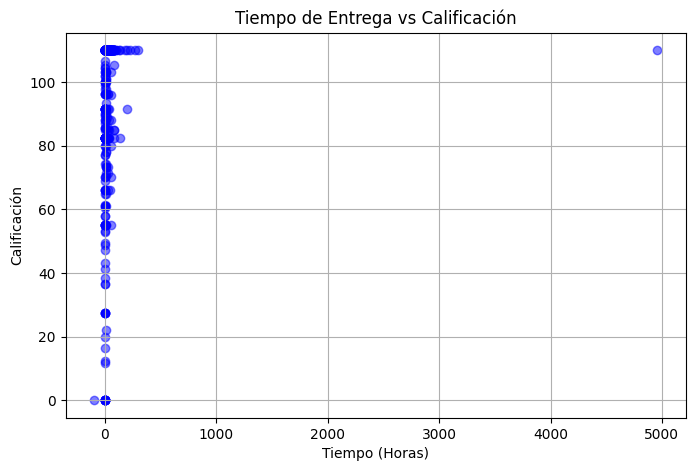

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Tiempo'], df['Calificacion'], color='blue', alpha=0.5)
plt.title('Tiempo de Entrega vs Calificación')
plt.xlabel('Tiempo (Horas)')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

There's a strange tiempo value that exceeds 4000. I will remove that value.

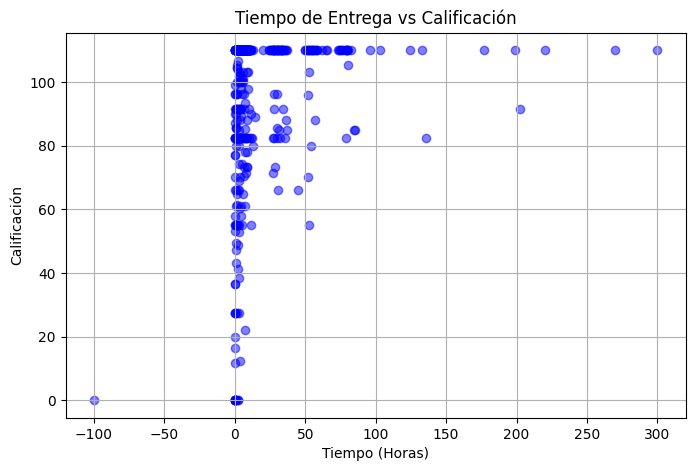

In [ ]:
df = df[df['Tiempo'] <= 4000]

plt.figure(figsize=(8,5))
plt.scatter(df['Tiempo'], df['Calificacion'], color='blue', alpha=0.5)
plt.title('Tiempo de Entrega vs Calificación')
plt.xlabel('Tiempo (Horas)')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

There's a strange tiempo value that is minus. I will remove that value.

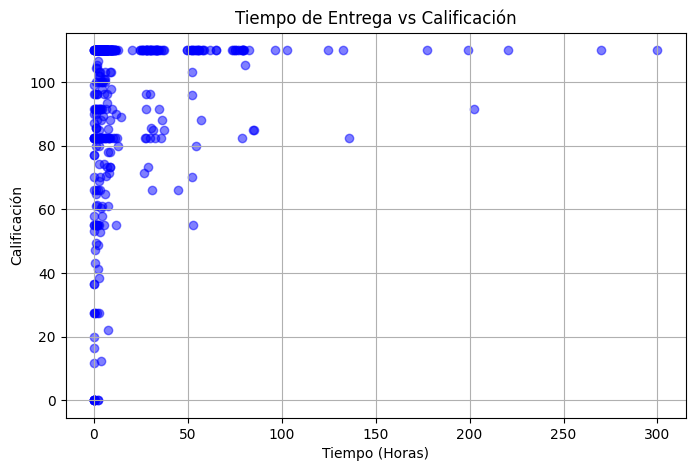

In [ ]:
df = df[df['Tiempo'] >= 0]

plt.figure(figsize=(8,5))
plt.scatter(df['Tiempo'], df['Calificacion'], color='blue', alpha=0.5)
plt.title('Tiempo de Entrega vs Calificación')
plt.xlabel('Tiempo (Horas)')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

**2. Split training and test data and calculate mean value**

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

print(f"Average hours of training data : {train['Tiempo'].mean()}")
print(f"Average score of training data : {train['Calificacion'].mean()}")
print(f"Average hours of test data : {test['Tiempo'].mean()}")
print(f"Average score of test data : {test['Calificacion'].mean()}")

Average hours of training data : 18.149184200654485
Average score of training data : 93.0009353820598
Average hours of test data : 16.629242032798448
Average score of test data : 96.61493666666667


**3. Multinomial regression model training**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# A quadratic polynomial
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(train[['Tiempo']], train['Calificacion'])

train_pred = poly_model.predict(train[['Tiempo']])

print(poly_model.named_steps['linearregression'].coef_)
print(poly_model.named_steps['linearregression'].intercept_)

[ 0.          0.39321517 -0.00131203]
87.92047921091785


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


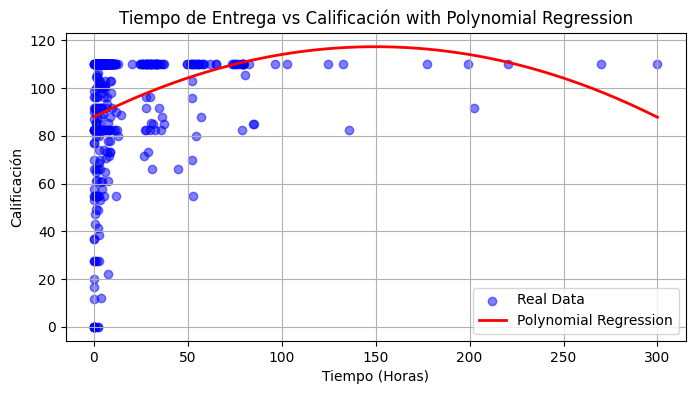

In [ ]:
import numpy as np

x_range = np.linspace(df['Tiempo'].min(), df['Tiempo'].max(), 100).reshape(-1, 1)
predictions = poly_model.predict(x_range)

plt.figure(figsize=(8, 4))
plt.scatter(df['Tiempo'], df['Calificacion'], color='blue', alpha=0.5, label='Real Data')
plt.plot(x_range, predictions, color='red', label='Polynomial Regression', linewidth=2)
plt.title('Tiempo de Entrega vs Calificación with Polynomial Regression')
plt.xlabel('Tiempo (Horas)')
plt.ylabel('Calificación')
plt.legend()
plt.grid(True)
plt.show()

Since tiempo values are concentrated near 0, the polynomial regression expressed as a function is considered inappropriate.

**4. Segment regression model training**

In [ ]:
from sklearn.metrics import mean_squared_error

def segment_regression(df, segment_points):
    segments = []
    start = 0
    for point in segment_points:
        segment = df.iloc[start:point]
        X = segment[['Tiempo']].values
        y = segment['Calificacion'].values
        model = np.polyfit(X.flatten(), y, 2)
        segments.append(model)
        start = point
    return segments

segment_points = [20,150]
segments = segment_regression(df, segment_points)

for i, segment in enumerate(segments):
    print(f"Segment {i+1}: {segment}")

Segment 1: [-5.18518097e-03  4.92557031e-01  9.23642516e+01]
Segment 2: [-4.36379793e-04  1.53383267e-01  9.63850617e+01]


**5. KNN regression model training**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

best_rse = float('inf')
best_k = 1

for k in range(1, 151):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train[['Tiempo']], train['Calificacion'])
    knn_pred = knn_model.predict(test[['Tiempo']])

    # RSE calculation
    mse = mean_squared_error(test['Calificacion'], knn_pred)
    rse = np.sqrt(mse)

    # Finding the best k value that has the lowest RSE.
    if rse < best_rse:
        best_rse = rse
        best_k = k

print(f"The best k value : {best_k}")

The best k value : 36


**6. RSE calculation**

In [ ]:
import numpy as np

def calculate_rse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

poly_pred_test = poly_model.predict(test[['Tiempo']])
knn_pred_test = knn_model.predict(test[['Tiempo']])

rse_poly = calculate_rse(test['Calificacion'], poly_pred_test)
rse_knn = calculate_rse(test['Calificacion'], knn_pred_test)

print(f"RSE of polynomial regression model : {rse_poly}")
print(f"RSE of the KNN Model : {rse_knn}")

RSE of polynomial regression model : 22.383831136199166
RSE of the KNN Model : 21.661970149769317


**7. Predicted and Actual Value Comparison Graph**

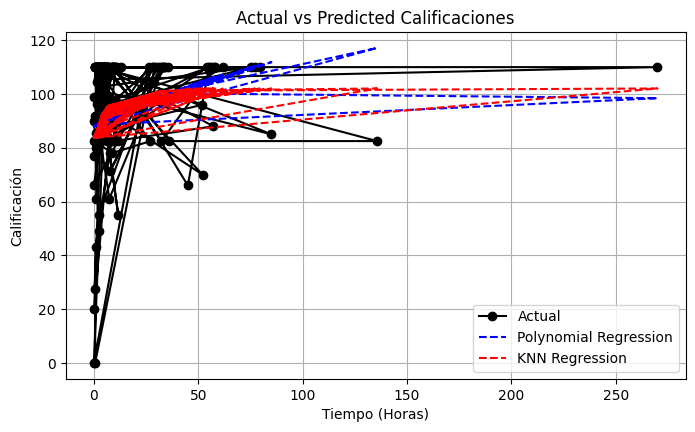

In [ ]:
plt.figure(figsize=(8,4.5))
plt.plot(test['Tiempo'], test['Calificacion'], label='Actual', color='black', marker='o')
plt.plot(test['Tiempo'], poly_pred_test, label='Polynomial Regression', color='blue', linestyle='--')
plt.plot(test['Tiempo'], knn_pred_test, label='KNN Regression', color='red', linestyle='--')

plt.title('Actual vs Predicted Calificaciones')
plt.xlabel('Tiempo (Horas)')
plt.ylabel('Calificación')
plt.legend()
plt.grid(True)
plt.show()